In [1]:
import numpy as np
import pandas as pd

In [4]:
df =pd.read_csv('/content/uber_clean.csv')

In [5]:
df.head()

,Date/Time,Lat,Lon,Base,Date
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday


In [7]:
x = df[['Lat','Lon']]
y = df[]

In [8]:
x

,Lat,Lon
0,40.7586,-73.9706
1,40.7605,-73.9994
2,40.7320,-73.9999
3,40.7635,-73.9793
4,40.7204,-74.0047
...,...,...
84112,40.6456,-73.7767
84113,40.6722,-73.9717
84114,40.6444,-73.7819
84115,40.7672,-73.9663


In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
model = KMeans(n_clusters=6)
y_pred = model.fit_predict(x)

In [12]:
df['prediction'] = y_pred

In [13]:
df

,Date/Time,Lat,Lon,Base,Date,prediction
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday,5
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday,5
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday,0
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday,5
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday,0
...,...,...,...,...,...,...
84112,2014-07-08 22:33,40.6456,-73.7767,B02598,Tuesday,4
84113,2014-07-08 22:33,40.6722,-73.9717,B02598,Tuesday,0
84114,2014-07-08 22:33,40.6444,-73.7819,B02598,Tuesday,4
84115,2014-07-08 22:34,40.7672,-73.9663,B02598,Tuesday,5


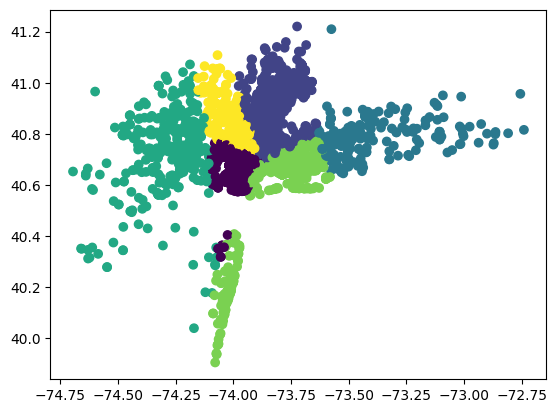

In [14]:
plt.scatter(df['Lon'] ,df['Lat'],c=df['prediction'])

In [26]:
model_inertia_list = []
for i in range(1,11):
  model = KMeans(n_clusters=i)
  model.fit(x)
  model_inertia_list.append(model.inertia_)

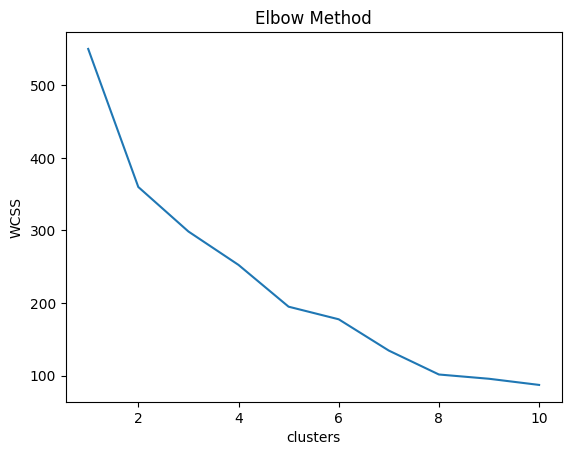

In [27]:
plt.plot(range(1,11),model_inertia_list)
plt.xlabel('clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [31]:
df = df[:2000]

cluster_1 = df[['Lat','Lon']][df['prediction']==0].values.tolist()
cluster_2 = df[['Lat','Lon']][df['prediction']==1].values.tolist()
cluster_3 = df[['Lat','Lon']][df['prediction']==2].values.tolist()

In [32]:
import folium

In [38]:
map = folium.Map(location=[40.6456,-73.7767	],zoom_start = 10, tiles = 'openstreetmap')

In [39]:
map

In [46]:
for i in cluster_1:
  folium.CircleMarker(i, radius=2, color='blue', fill=True, fill_color='lightblue').add_to(map)

for i in cluster_3:
  folium.CircleMarker(i, radius=4, color='red', fill=True, fill_color='lightred').add_to(map)

for i in cluster_2:
  folium.CircleMarker(i, radius=3, color='green', fill=True, fill_color='lightgreen').add_to(map)

In [47]:
map